Archive:  input.zip
   creating: input/haarcascades/
  inflating: input/haarcascades/haarcascade_eye.xml  
  inflating: input/haarcascades/haarcascade_eye_tree_eyeglasses.xml  
  inflating: input/haarcascades/haarcascade_frontalcatface.xml  
  inflating: input/haarcascades/haarcascade_frontalcatface_extended.xml  
  inflating: input/haarcascades/haarcascade_frontalface_alt.xml  
  inflating: input/haarcascades/haarcascade_frontalface_alt_tree.xml  
  inflating: input/haarcascades/haarcascade_frontalface_alt2.xml  
  inflating: input/haarcascades/haarcascade_frontalface_default.xml  
  inflating: input/haarcascades/haarcascade_fullbody.xml  
  inflating: input/haarcascades/haarcascade_lefteye_2splits.xml  
  inflating: input/haarcascades/haarcascade_licence_plate_rus_16stages.xml  
  inflating: input/haarcascades/haarcascade_lowerbody.xml  
  inflating: input/haarcascades/haarcascade_profileface.xml  
  inflating: input/haarcascades/haarcascade_righteye_2splits.xml  
  inflating: input/

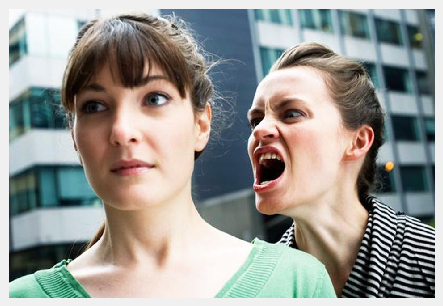

Number of faces detected: 2


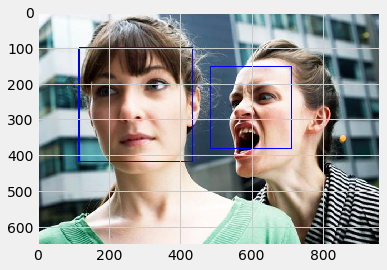

Total number of loaded face images is 0
Number of faces detected: 2


<Figure size 1080x1296 with 0 Axes>

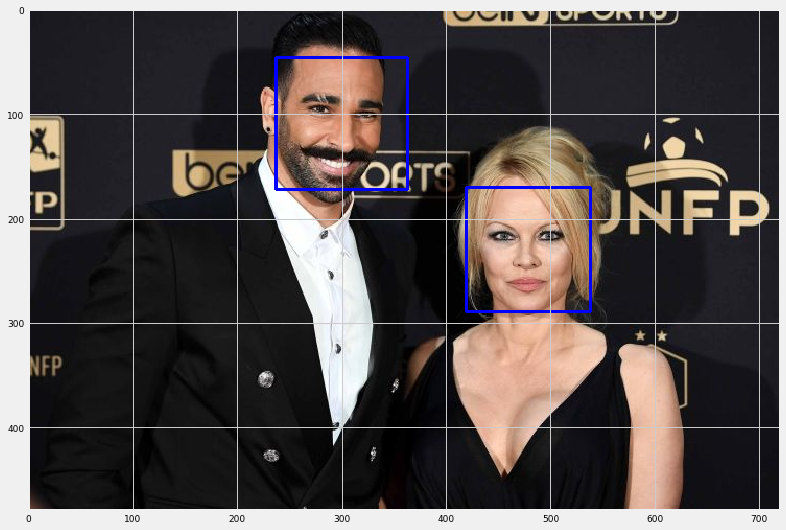

In [1]:
import sys
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#Visiulazation
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec
import glob
#image processing
import cv2
#extracting zippped file
import tarfile
#systems
import os
!unzip input.zip
print(os.listdir("input"))

from sklearn import decomposition
from sklearn.neighbors import KernelDensity
from sklearn.manifold import TSNE

matplotlib.style.use('fivethirtyeight')  

#example
imgg="./input/photos/2.jpg"
celeb=cv2.imread(imgg)

def show_image(image):
    plt.figure(figsize=(8,5))
    #Before showing image, bgr color order transformed to rgb order
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.xticks([])
    plt.yticks([])
    plt.show()

show_image(celeb)
# Our face detection function that uses haarcascade from OpenCV
def face_detection(img):
    face_cascade = cv2.CascadeClassifier('./input/haarcascades/haarcascade_frontalface_alt.xml')
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    print('Number of faces detected:', len(faces))
        
    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        #img = img[y:y+h, x:x+w] # for cropping
    cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return cv_rgb
#imgg2=cv2.imread("/kaggle/input/photos/ben.jpg")
a=face_detection(celeb)
plt.imshow(a)
plt.show()

# as shown below, the library is not detecting this particular face angle of Ben Afflek
plt.figure(figsize=(15,18)) 
img=cv2.imread("./rami_couple.jpg")

#soccer_player_classifier
#%% load the data, go over training images and store them in a list
maleFaceFiles   = glob.glob('Pictures/*.png')
femaleFaceFiles = glob.glob('Pictures_f/*.png')
faceFiles = maleFaceFiles + femaleFaceFiles

listOfPlayerNames = []   
listOfImages = []
for imageFilename in faceFiles:
    currName = imageFilename.split("/")[-1].split('.')[0] 
        
    try:
        currImage = mpimg.imread(imageFilename)
        if len(np.unique(currImage[:,:,0].ravel())) <= 40:
            print("no image for '" + currName + "'")
        else:
            listOfPlayerNames.append(currName)
            listOfImages.append(currImage)
    except:
        print("didn't load '" + currName + "'")
        
femaleNames = [x.split("/")[-1].split('.')[0] for x in femaleFaceFiles]
isFemale    = [x in femaleNames for x in listOfPlayerNames]

print('Total number of loaded face images is %d' %(len(listOfImages)))

#%% show some images
matplotlib.rcParams['font.size'] = 9
matplotlib.rcParams['figure.figsize'] = (12,19)
plt.figure()

c=face_detection(img)
plt.imshow(c)
plt.show()
 

In [3]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored